--- k-NN Classification ---

Results for k = 1:
x51 = 0.7160 → Class2
x52 = 0.2934 → Class1
x53 = 0.2462 → Class1
x54 = 0.7195 → Class2
x55 = 0.4123 → Class1
x56 = 0.8785 → Class2
x57 = 0.5704 → Class2
x58 = 0.8503 → Class2
x59 = 0.7176 → Class2
x60 = 0.8303 → Class2
x61 = 0.8565 → Class2
x62 = 0.0997 → Class1
x63 = 0.4358 → Class1
x64 = 0.4813 → Class1
x65 = 0.4619 → Class1
x66 = 0.2724 → Class1
x67 = 0.4283 → Class1
x68 = 0.5485 → Class2
x69 = 0.2994 → Class1
x70 = 0.7291 → Class2
x71 = 0.1115 → Class1
x72 = 0.4144 → Class1
x73 = 0.2934 → Class1
x74 = 0.4572 → Class1
x75 = 0.2780 → Class1
x76 = 0.6630 → Class2
x77 = 0.5031 → Class1
x78 = 0.0012 → Class1
x79 = 0.3955 → Class1
x80 = 0.6494 → Class2
x81 = 0.5879 → Class2
x82 = 0.7183 → Class2
x83 = 0.3126 → Class1
x84 = 0.1474 → Class1
x85 = 0.6087 → Class2
x86 = 0.5613 → Class2
x87 = 0.8189 → Class2
x88 = 0.3613 → Class1
x89 = 0.8157 → Class2
x90 = 0.7479 → Class2
x91 = 0.2990 → Class1
x92 = 0.4861 → Class1
x93 = 0.5576 → Class2
x94 = 

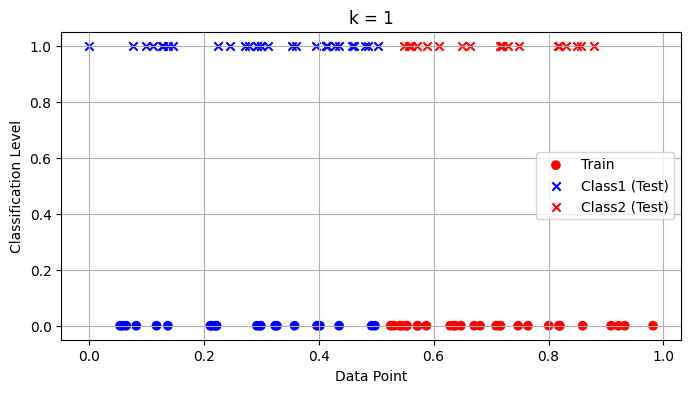

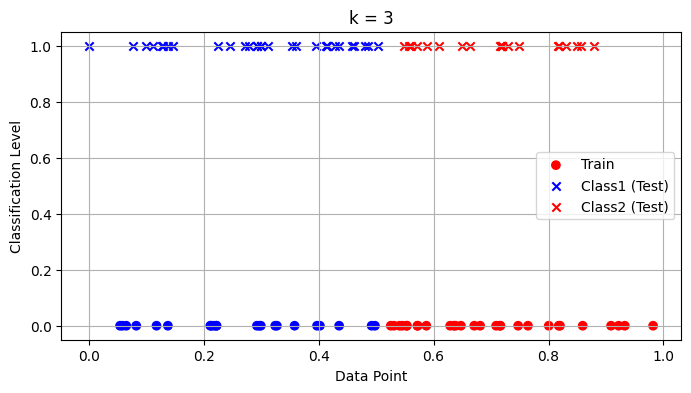

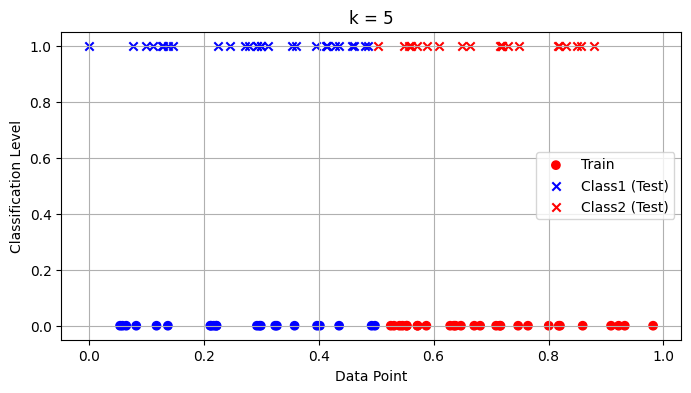

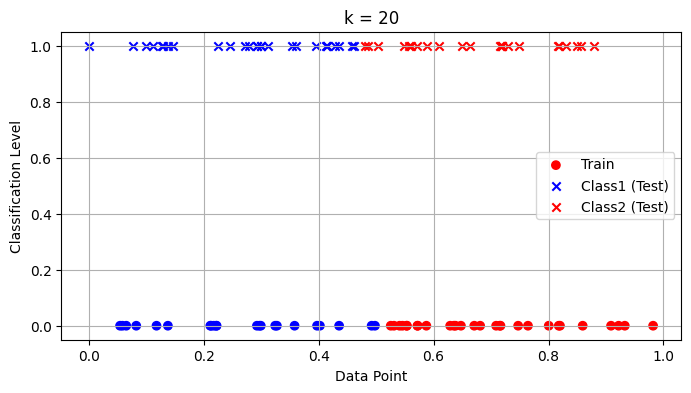

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

data = np.random.rand(100)
train, test = data[:50], data[50:]
labels = ["Class1" if x <= 0.5 else "Class2" for x in train]

def knn(x, train, labels, k):
    dists = sorted(((abs(x - t), l) for t, l in zip(train, labels)))
    return Counter(l for _, l in dists[:k]).most_common(1)[0][0]


k_vals = [1, 3, 5, 20]
results = {}

print("--- k-NN Classification ---")
for k in k_vals:
    classified = [knn(x, train, labels, k) for x in test]
    results[k] = classified
    print(f"\nResults for k = {k}:")
    for i, (x, lbl) in enumerate(zip(test, classified), 51):
        print(f"x{i} = {x:.4f} → {lbl}")

for k in k_vals:
    class1 = [x for x, l in zip(test, results[k]) if l == "Class1"]
    class2 = [x for x, l in zip(test, results[k]) if l == "Class2"]
    
    plt.figure(figsize=(8, 4))
    plt.scatter(train, [0]*len(train), c=["blue" if l=="Class1" else "red" for l in labels], label="Train", marker='o')
    plt.scatter(class1, [1]*len(class1), c="blue", label="Class1 (Test)", marker='x')
    plt.scatter(class2, [1]*len(class2), c="red", label="Class2 (Test)", marker='x')
    plt.title(f"k = {k}")
    plt.xlabel("Data Point") 
    plt.ylabel("Classification Level")
    plt.grid(True)
    plt.legend()
    plt.show()
